In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

## 2. Load and Explore Dataset

Load all datasets, display their shapes, and preview the data.

In [2]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Display shapes
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('Sample Submission shape:', sample_submission.shape)

# Preview data
print('\nTrain head:')
display(train.head())
print('\nTest head:')
display(test.head())
print('\nSample Submission head:')
display(sample_submission.head())

# Info and describe
print('\nTrain info:')
train.info()
print('\nTrain describe:')
display(train.describe(include='all'))

Train shape: (750000, 18)
Test shape: (250000, 17)
Sample Submission shape: (250000, 2)

Train head:


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



Test head:


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown



Sample Submission head:


,id,y
0,750000,0.5
1,750001,0.5
2,750002,0.5
3,750003,0.5
4,750004,0.5



Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB

Train describe:


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,750000.000000,750000.000000,750000,750000,750000,750000,750000.000000,750000,750000,750000,750000.000000,750000,750000.000000,750000.000000,750000.000000,750000.000000,750000,750000.000000
unique,NaN,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,NaN,175541,480759,401683,737151,NaN,411288,645023,486655,NaN,228411,NaN,NaN,NaN,NaN,672450,NaN
mean,374999.500000,40.926395,NaN,NaN,NaN,NaN,1204.067397,NaN,NaN,NaN,16.117209,NaN,256.229144,2.577008,22.412733,0.298545,NaN,0.120651
std,216506.495284,10.098829,NaN,NaN,NaN,NaN,2836.096759,NaN,NaN,NaN,8.250832,NaN,272.555662,2.718514,77.319998,1.335926,NaN,0.325721
min,0.000000,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,-1.000000,0.000000,NaN,0.000000
25%,187499.750000,33.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,9.000000,NaN,91.000000,1.000000,-1.000000,0.000000,NaN,0.000000
50%,374999.500000,39.000000,NaN,NaN,NaN,NaN,634.000000,NaN,NaN,NaN,17.000000,NaN,133.000000,2.000000,-1.000000,0.000000,NaN,0.000000
75%,562499.250000,48.000000,NaN,NaN,NaN,NaN,1390.000000,NaN,NaN,NaN,21.000000,NaN,361.000000,3.000000,-1.000000,0.000000,NaN,0.000000


## 3. Data Cleaning

Identify and handle missing values, duplicates, and inconsistent entries. Visualize missing data patterns.

Missing values in train:


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Missing values in test:


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

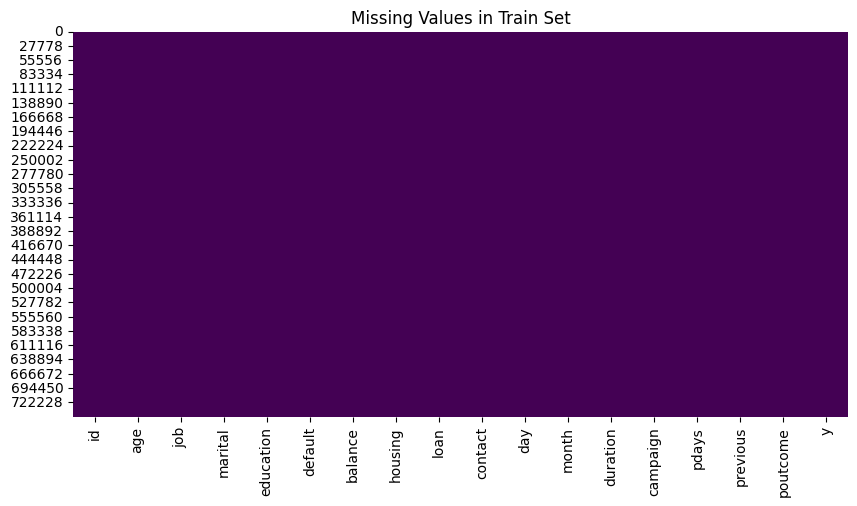

Duplicate rows in train: 0


In [3]:
# Check for missing values
print('Missing values in train:')
display(train.isnull().sum())
print('Missing values in test:')
display(test.isnull().sum())

# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Set')
plt.show()

# Check for duplicates
print('Duplicate rows in train:', train.duplicated().sum())
train = train.drop_duplicates()

# (Optional) Handle inconsistent entries if any (domain-specific, to be filled after EDA)
# ...

## 4. Data Preprocessing

Encode categorical variables, scale numerical features, and prepare data for modeling.

In [4]:
# Identify categorical and numerical columns
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
num_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'y' in num_cols:
    num_cols.remove('y')
if 'id' in num_cols:
    num_cols.remove('id')

# Encode categorical variables
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.transform(test[col].astype(str))
    le_dict[col] = le

# Scale numerical features
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

## 5. Feature Engineering

Create or modify features to improve model performance.

In [5]:
# Example: Create interaction features or binning (customize as needed)
# Here, we just show a placeholder for feature engineering
# You can add domain-specific features after EDA

# Example: train['new_feature'] = train['feature1'] * train['feature2']
# test['new_feature'] = test['feature1'] * test['feature2']

# For now, continue with existing features

## 6. Train-Test Split

Split the data into training and validation sets for model evaluation.

In [6]:
# Prepare features and target
X = train.drop(['id', 'y'], axis=1)
y = train['y']

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)

Train set: (600000, 16) (600000,)
Validation set: (150000, 16) (150000,)


## 7. Model Selection and Training

Train several models and compare their performance.

In [7]:
# Train and compare models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    results[name] = auc
    print(f'{name} ROC-AUC: {auc:.4f}')

# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f'\nBest model: {best_model_name}')

Logistic Regression ROC-AUC: 0.9210
Random Forest ROC-AUC: 0.9621
Gradient Boosting ROC-AUC: 0.9550

Best model: Random Forest


## 8. Model Evaluation

Evaluate the best model using ROC-AUC, confusion matrix, and classification report. Visualize ROC curve.

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    131902
           1       0.75      0.65      0.69     18098

    accuracy                           0.93    150000
   macro avg       0.85      0.81      0.83    150000
weighted avg       0.93      0.93      0.93    150000

Confusion Matrix:


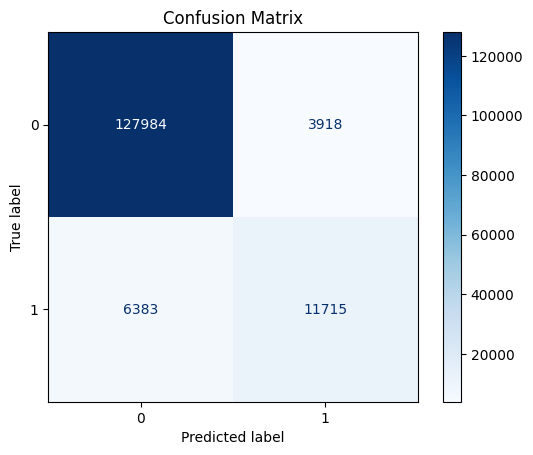

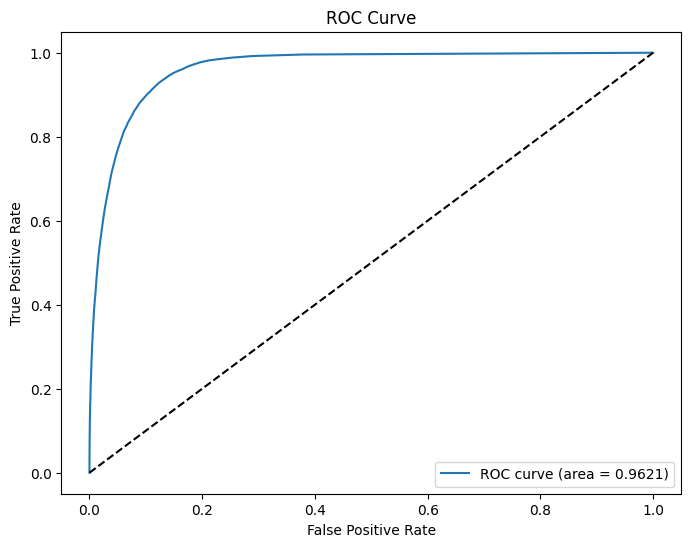

In [8]:
# Evaluate best model
from sklearn.metrics import ConfusionMatrixDisplay

y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

print('Classification Report:')
print(classification_report(y_val, y_val_pred))

print('Confusion Matrix:')
cm = confusion_matrix(y_val, y_val_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_val, y_val_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 9. Generate and Display Outputs

Generate predictions for the test set and create the submission file.

In [9]:
# Prepare test features
X_test = test.drop(['id'], axis=1)

test_proba = best_model.predict_proba(X_test)[:, 1]

submission = sample_submission.copy()
submission['y'] = test_proba
submission.to_csv('submission.csv', index=False)

print('Submission file created: submission.csv')
display(submission.head())

Submission file created: submission.csv


,id,y
0,750000,0.00
1,750001,0.18
2,750002,0.02
3,750003,0.01
4,750004,0.04
